In [1]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

import matplotlib
from matplotlib import pyplot
%matplotlib inline


In [2]:
# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 50

# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


### check normality 

#### thru visual plots (histograms)

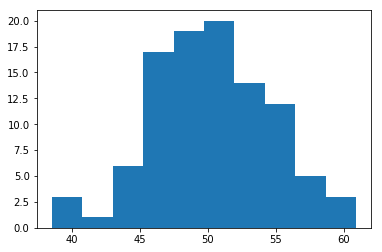

In [3]:
# histogram plot
pyplot.hist(data);


Gaussian-like shape to the data, that although is not strongly the familiar bell-shape, is a rough approximation.

#### Visual plots - Quantile-Quantile Plot

Another popular plot for checking the distribution of a data sample is the __quantile-quantile plot, Q-Q plot, or QQ plot__ for short.

This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.

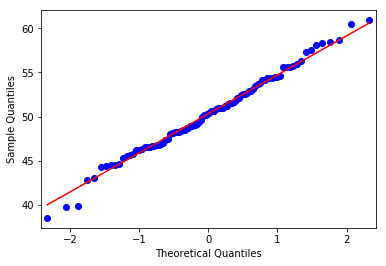

In [4]:
# q-q plot
qqplot(data, line='s');

#### Statistical Normality Tests

The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

- $H_0 :$ sample drawn from a Gaussian distribution
- $H_A :$ sample NOT drawn from a Gaussian distribution

Each test will return at least two things:

- Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.

- p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.

In the SciPy implementation of these tests, you can interpret the p value as follows.


- p <= alpha: reject H0, not normal.
- p > alpha: fail to reject H0, normal.

#### 1. Shapiro-Wilk Test
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In [5]:
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


#### 2. D’Agostino’s K^2 Test
The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

The D’Agostino’s K^2 test is available via the normaltest() SciPy function and returns the test statistic and the p-value.

In [7]:
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


In [9]:
# normality test
result  = anderson(data)
p = 0
print('{:15s}  {:15s}  {:15s}'.format('Significance Level', 'Test Statistic', 'Critical Value'))
print('{:15s}  {:15s}  {:15s}'.format('------------------', '--------------', '--------------'))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]    
    
    if result.statistic < result.critical_values[i]:
        print('{:17d}%  {:14.3f} {:16.3f} Test stats < CV,  (fail to reject H0)'.format(int(sl), result.statistic, cv))
    else:
        print('{:17d}%  {:14.3f} {:16.3f} Test stats >= CV, (reject H0)'.format(int(sl), result.statistic, cv))

Significance Level  Test Statistic   Critical Value 
------------------  --------------   -------------- 
               15%           0.220            0.555 Test stats < CV,  (fail to reject H0)
               10%           0.220            0.632 Test stats < CV,  (fail to reject H0)
                5%           0.220            0.759 Test stats < CV,  (fail to reject H0)
                2%           0.220            0.885 Test stats < CV,  (fail to reject H0)
                1%           0.220            1.053 Test stats < CV,  (fail to reject H0)
